# Script File for Final Online Assessment (FOA) Submission
## BACS3013 Data Science

### Academic Year 2021/2022  
### December Examination

It is an open-book e-assessment. You are allowed to refer to any practical notes/use cases/GitHub/Stack Overflow etc. Anyhow, you **MUST NOT** receive any help whatsoever from any other person. If you need any clarification, please directly ask the lecturer(s)-in-charge.

## Please insert your details below:
    
1) Double click the cell below


2) Type your name and student id


3) press CTRL + Enter

# Name: DENNIS LAU YIK ANN
# Student ID: 1911WMR977

# Step 1: Put the last three digits of your student id as the my_state_number

eg: if your id is 1902589

You should then write


my_state_number = 589

In [1]:
# Replace 589 with the last three digits of your student id
# and then press CTRL + Enter
my_state_number = 977

# Step 2: Read the insurance_dataset.csv

In [2]:
import pandas as pd
data = pd.read_csv("insurance_dataset.csv")

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Class
0,167647,Male,22,1,7,1,< 1 Year,No,2630,152,0
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327,26,0
2,32023,Female,66,1,33,0,1-2 Year,Yes,35841,124,0
3,87447,Female,22,1,33,0,< 1 Year,No,27645,152,0
4,501933,Male,28,1,46,1,< 1 Year,No,29023,152,0


# Step 3: Sample the data randomly the data and save the dataframe as myData

In [9]:
myData = data.sample(frac =.00275, replace = False, random_state = my_state_number)
myData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Class
213783,249591,Female,27,1,21,1,< 1 Year,No,31731,152,0
5250,345846,Female,23,1,41,1,< 1 Year,No,26251,152,0
371088,170964,Male,33,1,50,1,< 1 Year,No,37183,152,0
274533,126700,Male,45,1,28,0,1-2 Year,Yes,45281,26,0
312191,348849,Male,26,1,46,0,< 1 Year,Yes,22145,152,1


# Step 4: Start the Analytics using **myData** dataframe as the raw data
Note: Your *myData* dataframe may be different from other students' *myData* dataframe

# 1.0 Import dependencies

In [10]:
# Start your codes

# General import
import time
import timeit
import warnings
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Preprocessing import
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Modelling import
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Ignore filterwarnings
warnings.filterwarnings("ignore")

# 2.0 Data Exploration

## 2.1 Dataset Detail(s)

In [11]:
# Check dataset info(s)
myData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 213783 to 65752
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1051 non-null   int64 
 1   Gender                1051 non-null   object
 2   Age                   1051 non-null   int64 
 3   Driving_License       1051 non-null   int64 
 4   Region_Code           1051 non-null   int64 
 5   Previously_Insured    1051 non-null   int64 
 6   Vehicle_Age           1051 non-null   object
 7   Vehicle_Damage        1051 non-null   object
 8   Annual_Premium        1051 non-null   int64 
 9   Policy_Sales_Channel  1051 non-null   int64 
 10  Class                 1051 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 98.5+ KB


<b>From above, there are several observation(s):</b> 

<b>1:</b> There are 1051 rows of data entries and 11 columns of features in myData dataset. 

<b>2:</b> The naming of column names in myData are inconsistent where some uses underscores while some are not.

<b>3:</b> At the meantime, there are no null or missing data in myData because all columns having 1051 not-null count. 

<b>4:</b> Most columns are having `int64` as their datatype except `Gender`, `Vehicle_Age` and `Vehicle_Damage` which having `object` as their datatype.

<b>5:</b> Hence, `Gender`, `Vehicle_Age` and `Vehicle_Damage` are categorical columns while the rest are numerical columns by default.

## 2.2 Dropping Column(s)

In [12]:
# Drop useless column(s)
myData = myData.drop(columns="id")

Column `id` is dropped since it is index usage column and will not produce meaning in future analysis procedures.

## 2.3 Renaming Column(s)

In [13]:
# Rename column name(s)
myData = myData.rename(columns={"Driving_License"     : "DrivingLicense", 
                                "Region_Code"         : "RegionCode", 
                                "Previously_Insured"  : "PreviouslyInsured", 
                                "Vehicle_Age"         : "VehicleAge", 
                                "Vehicle_Damage"      : "VehicleDamage", 
                                "Annual_Premium"      : "AnnualPremium", 
                                "Policy_Sales_Channel": "PolicySalesChannel"})

Several data columns are renamed to avoid underscores. 

## 2.4 Statistical Summary

In [14]:
# Perfom statistical check for all numeric column(s) of the dataset and produce a summary
myData.describe()

,Age,DrivingLicense,RegionCode,PreviouslyInsured,AnnualPremium,PolicySalesChannel,Class
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,37.929591,0.999049,26.023787,0.472883,31261.243578,113.465271,0.158896
std,14.912724,0.030846,13.264934,0.499502,19485.041354,52.572123,0.365753
min,20.000000,0.000000,0.000000,0.000000,2630.000000,7.000000,0.000000
25%,25.000000,1.000000,14.500000,0.000000,24778.500000,60.000000,0.000000
50%,35.000000,1.000000,28.000000,0.000000,31952.000000,124.000000,0.000000
75%,47.000000,1.000000,35.000000,1.000000,39426.000000,152.000000,0.000000
max,82.000000,1.000000,52.000000,1.000000,346982.000000,163.000000,1.000000


<b>From the statistical summary above, there are several observation(s) and thought(s):</b>

<b>1:</b> It was observed that the max and min values of numerical columns of the dataset are having a huge different with one another. For example, `AnnualPremium` has a max value of around 346982 whereas `Age` has a max value of around 82. This might affect model accuracy in later section, hence data scaling is needed. 

<b>2:</b> If data values are going to be scaled, there are two scaling techniques came into consideration which are normalization and standardization depending on whether data distribution follow a Gaussian distribution. 

<b>3:</b> In short, normalization scale all data values into the range of 0 and 1 while standardization transforms data to have zero mean and making data unitless by performing standard labelling or other standardising methods. Normalization is good when data distribution does not follow a Gaussian distribution while Standardization, on the other hand, is helpful when the data follows a Gaussian distribution.

## 2.5 Exploratory Data Analysis

### 2.5.1 Numerical And Categorical Seperation

In [15]:
# Save numerical and categorical data into seperate dataframe
num_frame = myData[["Age", "RegionCode", "AnnualPremium", "PolicySalesChannel"]]
cat_frame = myData[["Gender", "DrivingLicense", "PreviouslyInsured", "VehicleAge", "VehicleDamage", "Class"]]

# Saving their column values
num_data = num_frame.columns.values
cat_data = cat_frame.columns.values

In this section, numerical and categorical data are saved into seperate dataframe for future use. In the meantime, `Age`, `RegionCode`, `AnnualPremium` and `PolicySalesChannel` remained as numerical data while the rest are clustered as categorical data because they are predefined variables which are not numerical in their nature. For example, `DrivingLicense` are categorical variable where each unique value of `DrivingLicense` column carries a specific representation such that 1 means having driving license while 0 means no. Next will be exploring the data distribution.

### 2.5.2 Data Distribution

<h5>Categorical Column(s)</h5> 

Data Distribution For Categorical Column(s): 


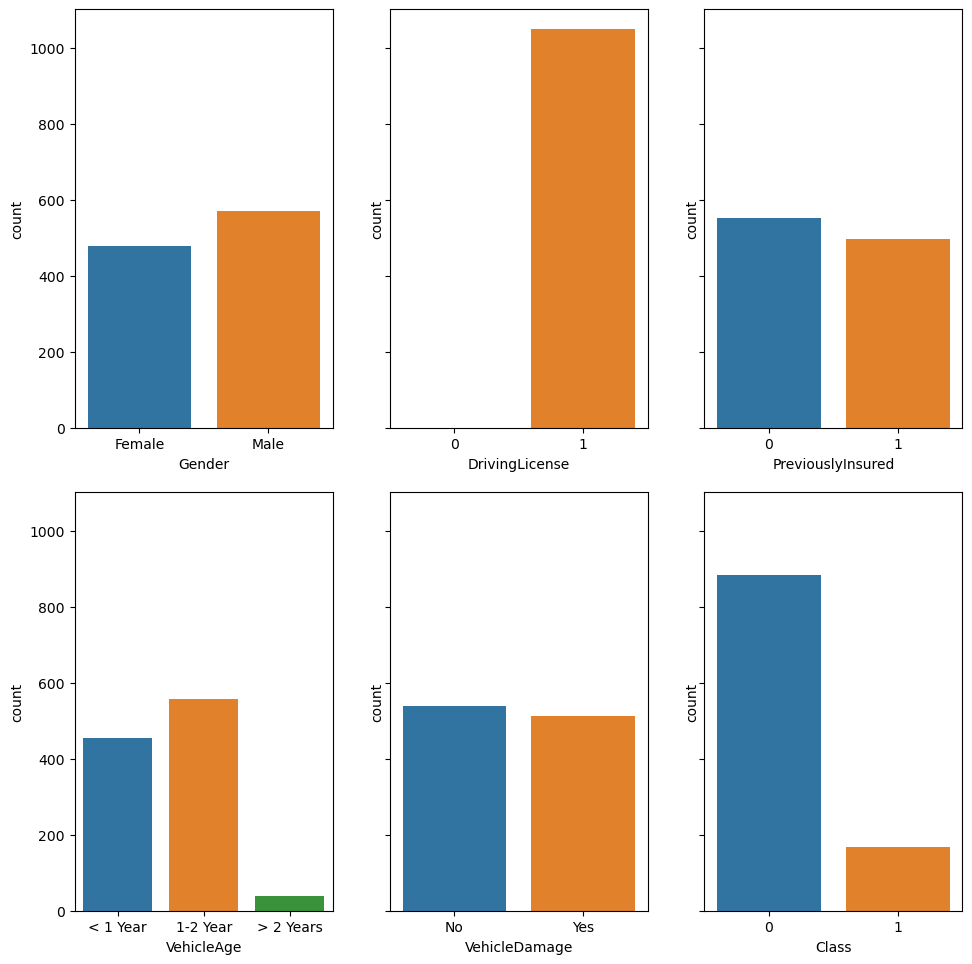

In [16]:
# Initialising
figure_size = (10, 10)
share_y = True
dots_per_inch = 100
padding = 2.5

# Ploting
print ("Data Distribution For Categorical Column(s): ")
c = 1
a = 0
b = 0
fig, axes = plt.subplots(2, 3, figsize=figure_size, squeeze=True, sharey=share_y, dpi=dots_per_inch)
fig.tight_layout(pad=padding)

for col in cat_frame:
    sns.countplot(x=col,data=myData, ax=axes[a,b])
    if (c%3==0):
        a += 1
        b = 0
    else:
        b += 1
    c += 1

<b>From above, there are several observation(s) and thought(s):</b>

<b>1:</b> There are more male customers (policyholders) recorded in this dataset than female.

<b>2:</b> Almost customers' (policyholders) have driving lisense.

<b>3:</b> Approximately 6/10 customers' (policyholders) have previously insured.

<b>4:</b> Most customers' (policyholders) vehicle aged less than 2 year.

<b>5:</b> Approximately 6/10 of customers (policyholders) have not damaged their vehicle before.

<b>6:</b> Most customers (policyholders) belongs to class 0 which indicating they are not interested in the Vehicle Insurance currently.

<h5>Numerical Column(s)</h5> 

Age: Not GaussianKstestResult(statistic=1.0, pvalue=0.0)
RegionCode: Not GaussianKstestResult(statistic=0.9777176566781701, pvalue=0.0)
AnnualPremium: Not GaussianKstestResult(statistic=1.0, pvalue=0.0)
PolicySalesChannel: Not GaussianKstestResult(statistic=0.9999999999987201, pvalue=0.0)
 
Data Distribution For Numerical Column(s): 


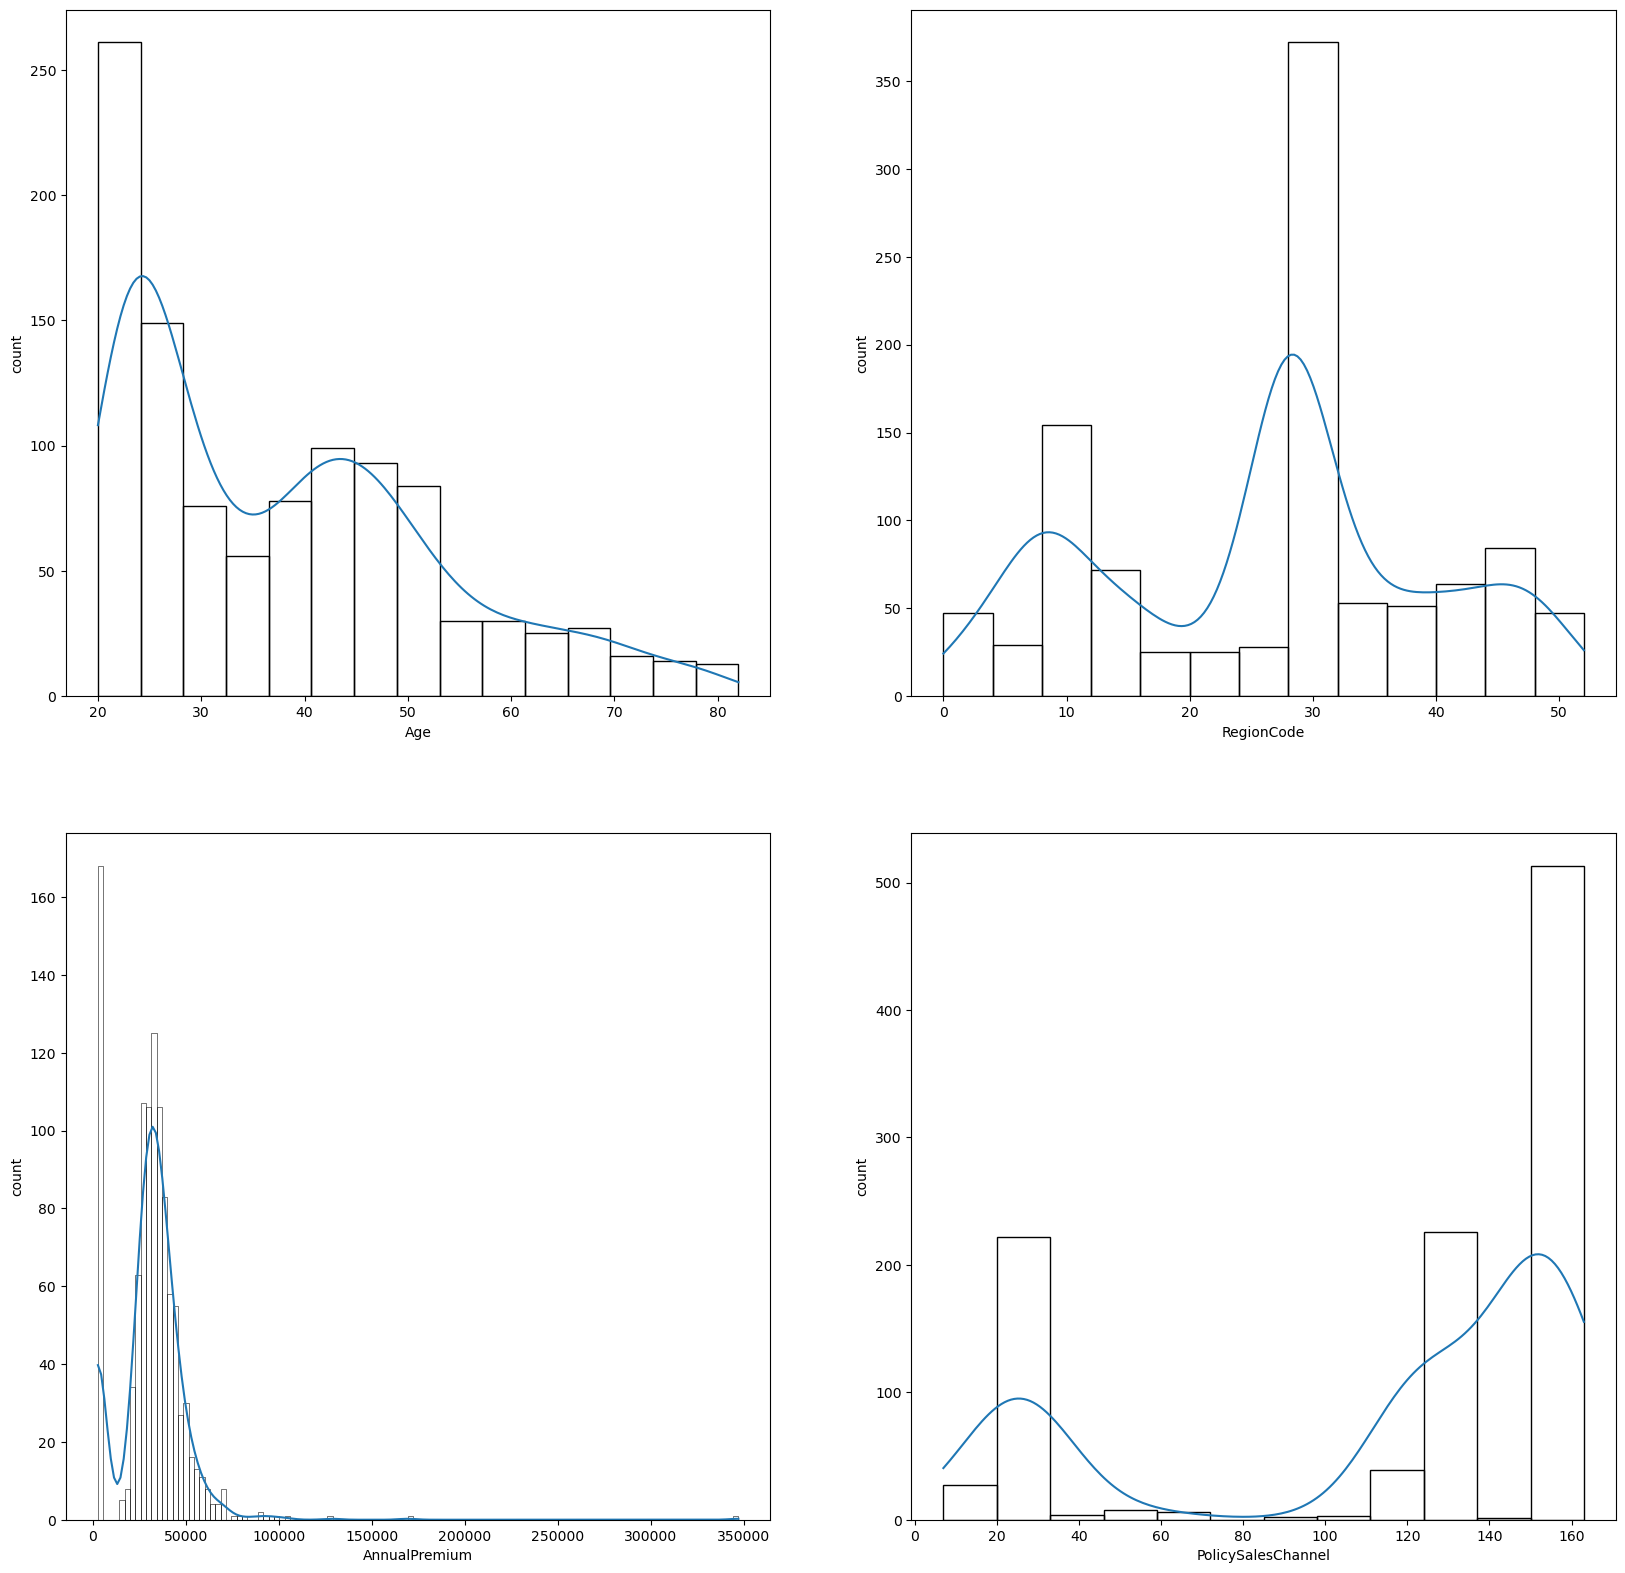

In [17]:
# Distribution check
for i in num_frame.columns:
    print(f"{i}: {'Not Gaussian' if kstest(num_frame[i].values,'norm')[1]<0.05 else 'Gaussian'}{kstest(num_frame[i].values,'norm')}")
    
# Initialising
figure_size = (20, 20)
dots_per_inch = 100
y_label = "count"
print (" ")
print ("Data Distribution For Numerical Column(s): ")

# Ploting
cols = list(num_data)

fig, ax = plt.subplots(2, 2, figsize=figure_size, dpi=dots_per_inch)
ax = ax.flatten()

for i in range(len(cols)):
    sns.histplot(data=num_frame, ax=ax[i], x=cols[i], kde=True, alpha=0)
    ax[i].set(xlabel=cols[i], ylabel=y_label)

<b>From above, there are several observation(s) and thought(s):</b>

<b>1:</b> Most customers (policyholders) are aged between 20 to 30 and 40 to 50.

<b>2:</b> Most customers (policyholders) are from region with `RegionCode` between 27 to 32.

<b>3:</b> Most customers (policyholders) have their `AnnualPremium` recorded between 0 to 100000.

<b>4:</b> Most customers (policyholders) have their `PolicySalesChannel` recorded between 0 to 40 and 120 to 160.

<b>5:</b> There are no graphs follow Gaussian Normal Distribution. Hence, sufficient evidence for choosing the standardization scaling method.

### 2.5.3 Vehicle Insurance Interest Analysis

<h5>Categorical Column(s)</h5> 

Vehicle Insurance Interest Analysis For Categorical Column(s):  


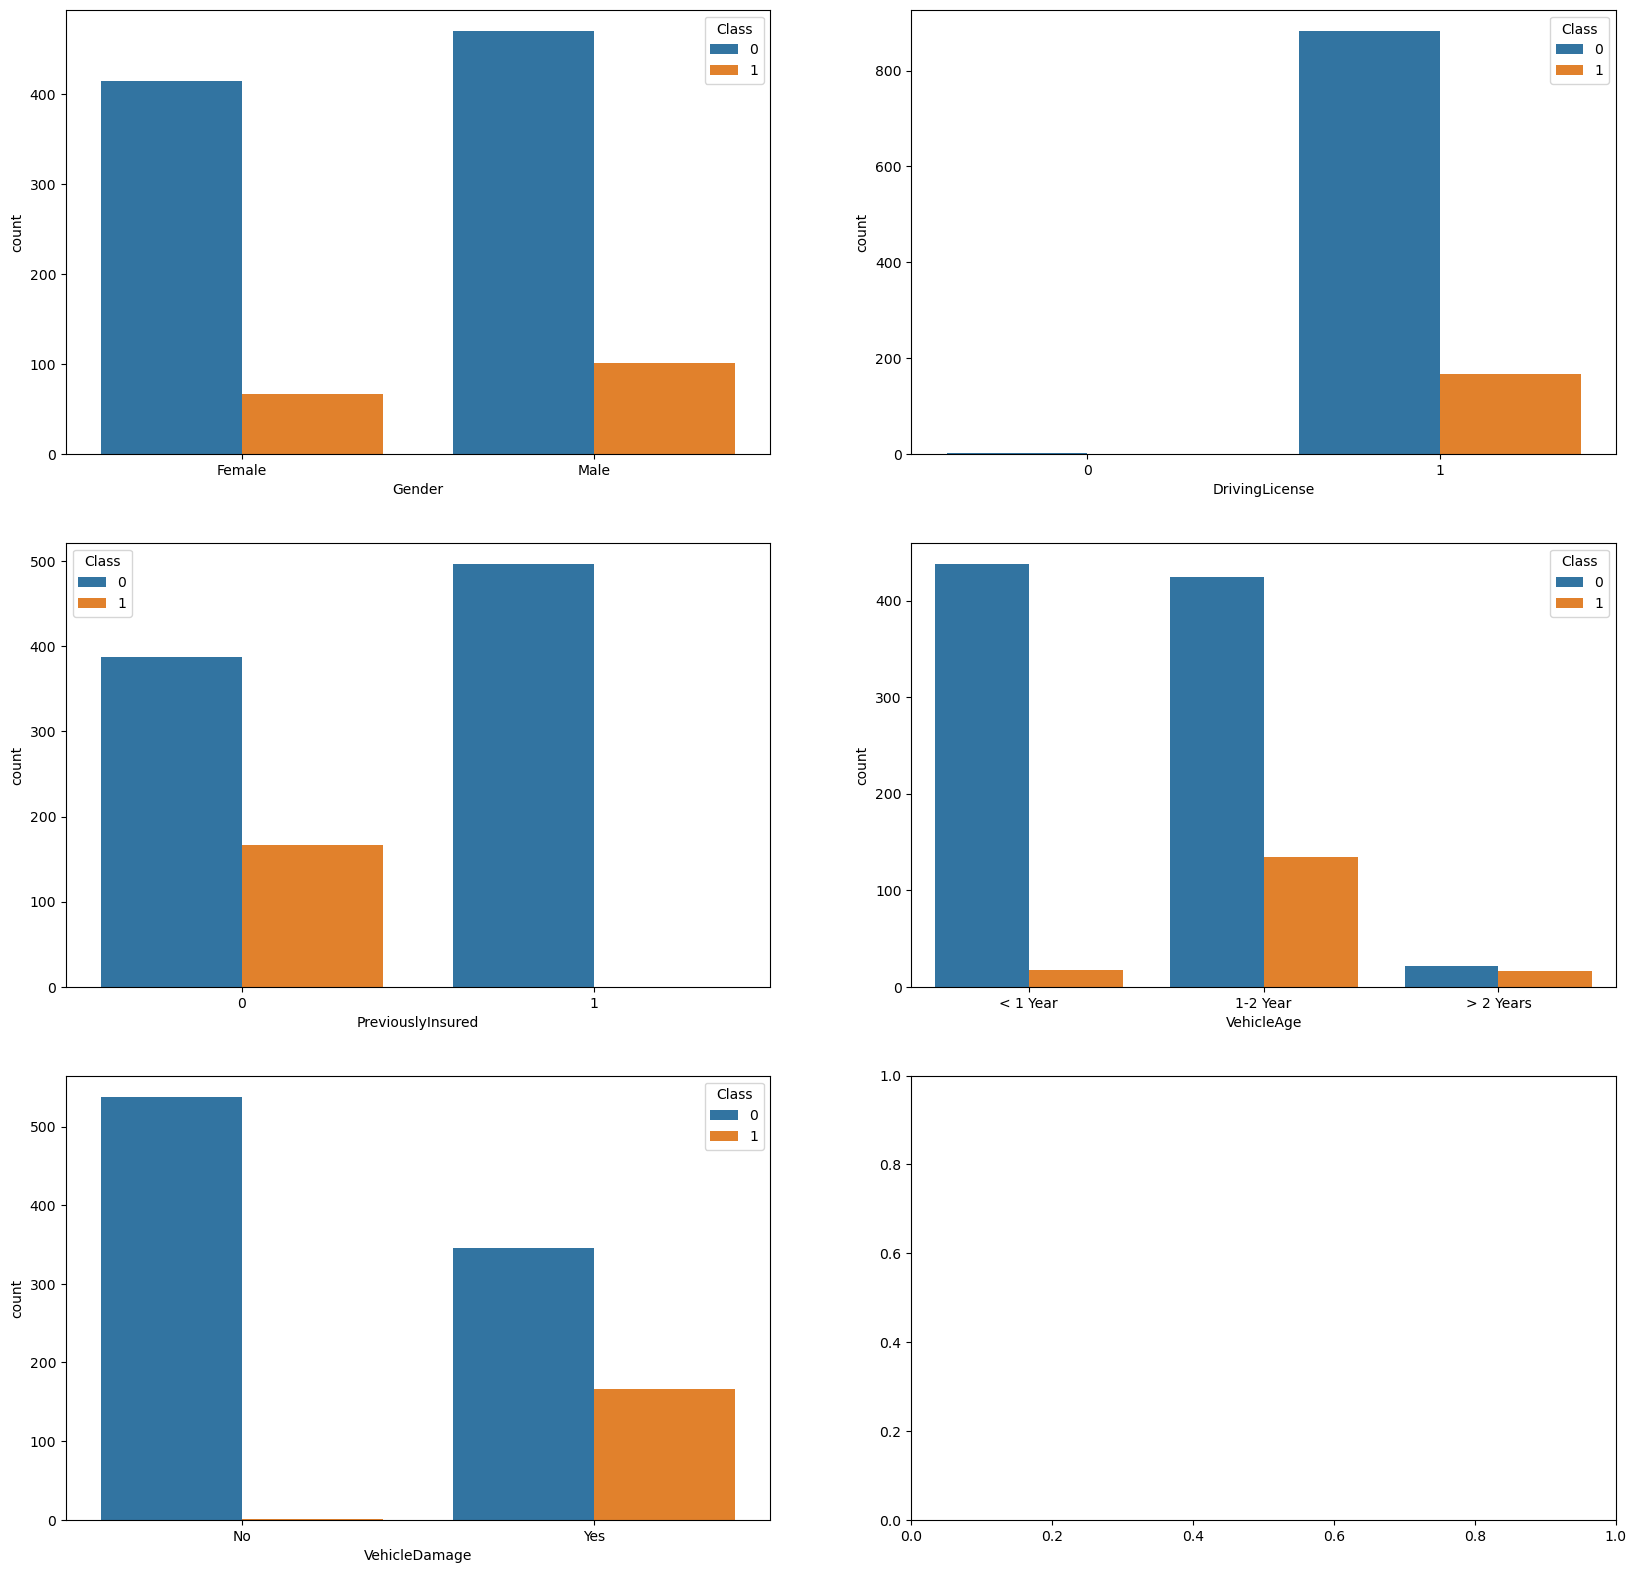

In [18]:
# Initialising
figure_size = (20, 20)
dots_per_inch = 100
ylabel="count"
print ("Vehicle Insurance Interest Analysis For Categorical Column(s):  ")

# Ploting
fig, ax = plt.subplots(3, 2, figsize=figure_size, dpi=dots_per_inch)
ax = ax.flatten()
for i, c in enumerate(cat_data):

    if(c == "Class"):
        continue
    sns.countplot(data=myData, ax=ax[i], x=c, hue="Class", alpha=1)
    ax[i].set(xlabel=c, ylabel=y_label)


<b>From above, there are several observation(s) and thought(s):</b>
(Noted that class 0 means the customer is not interested in the Vehicle Insurance.)

<b>1:</b> There are not significant relationship between `Gender` and `Class` (Vehicle Insurance Interest) because both male and female class ratio are approximatly the same.

<b>2:</b> Obviously observed that only customers (policyholders) with driving license will be interested in vehicle insurance.

<b>3:</b> Customers (policyholders) who have previously insured are more likely to be interested in vehicle insurance.

<b>4:</b> Customers (policyholders) who have their vehicle on the road for less than 2 years are more likely to be interested in vehicle insurance.

<b>5:</b> Customers (policyholders) who have their vehicle damaged before are more likely to be interested in vehicle insurance.

<h5>Numerical Column(s)</h5> 

Vehicle Insurance Interest Analysis For Categorical Column(s):  


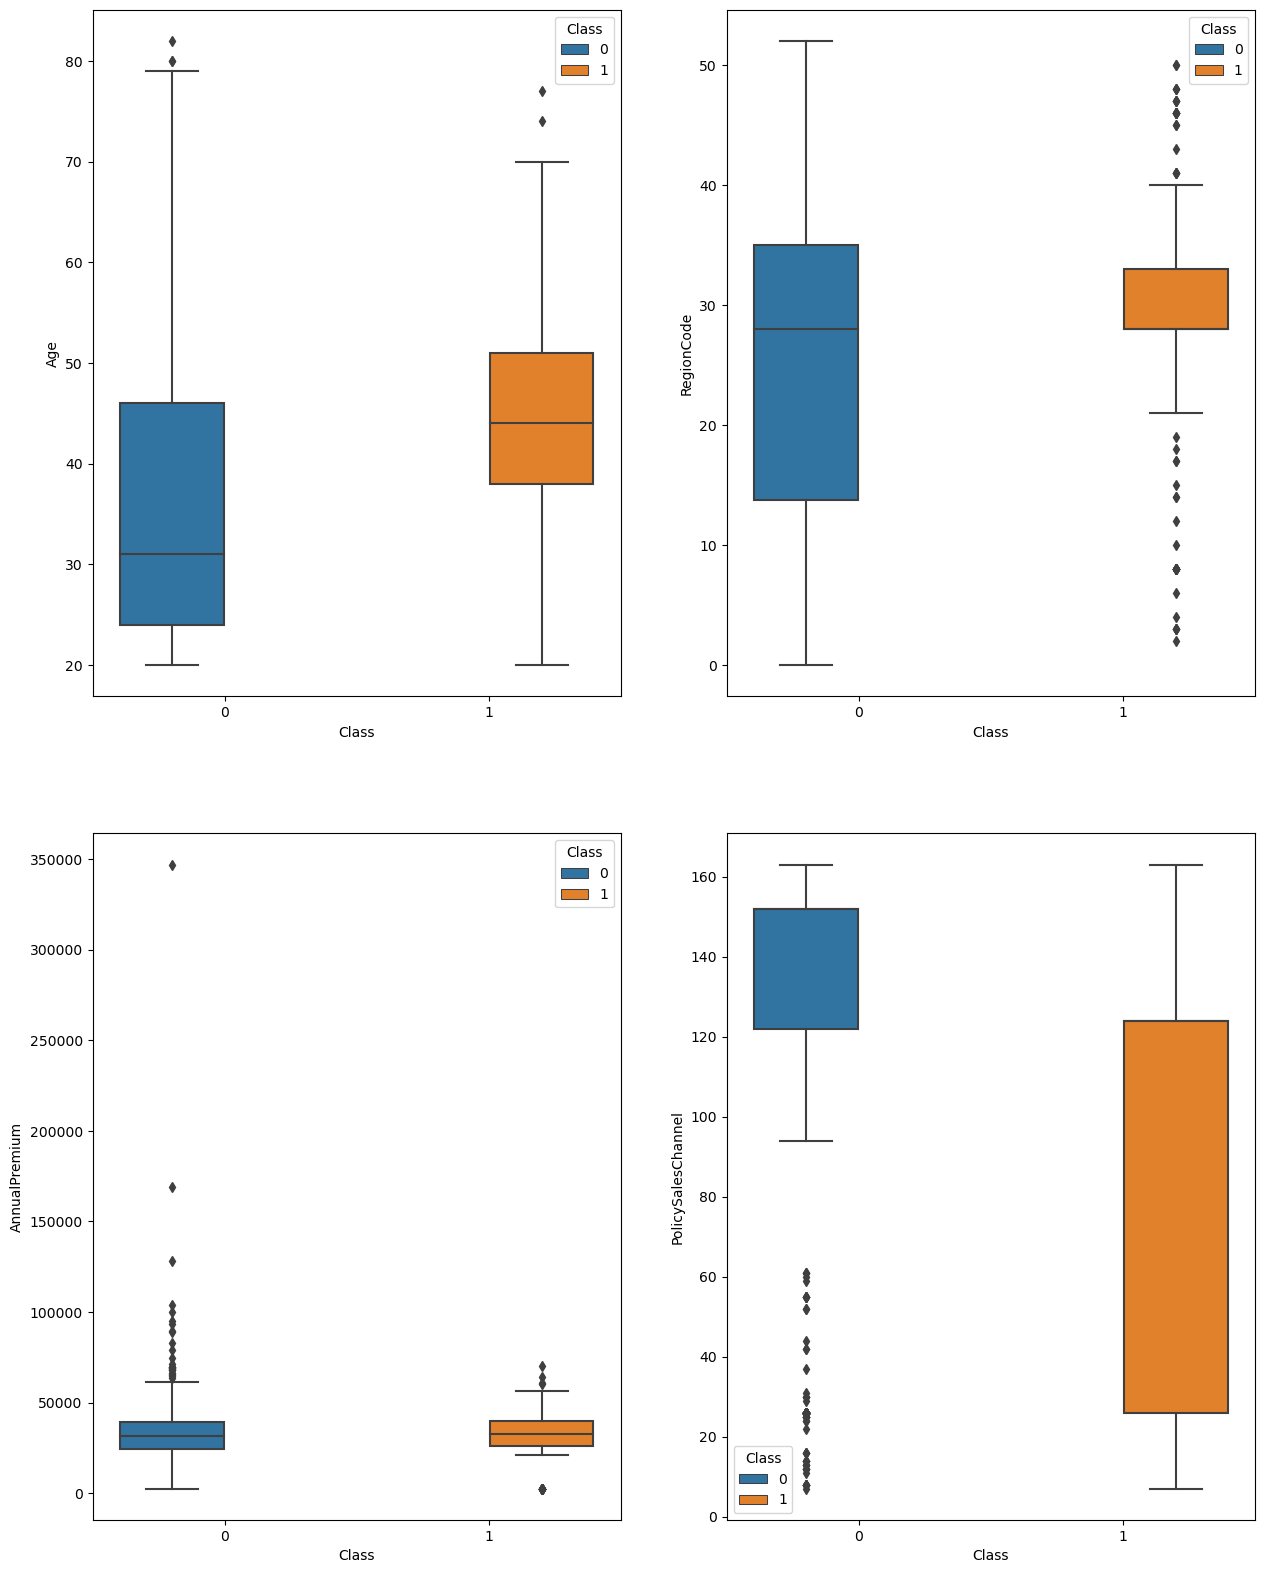

In [19]:
# Initialising
figure_size = (15, 20)
dots_per_inch = 100
ylabel="count"
print ("Vehicle Insurance Interest Analysis For Categorical Column(s):  ")

# Check for outliers and their relationship with `Class`
fig, axs = plt.subplots(2, 2, figsize = figure_size, dpi=dots_per_inch)     

plt1 = sns.boxplot(x = myData['Class'], y= myData['Age'], hue = myData['Class'], ax = axs[0,0])
plt2 = sns.boxplot(x = myData['Class'], y= myData['RegionCode'], hue = myData['Class'], ax = axs[0,1])
plt3 = sns.boxplot(x = myData['Class'], y= myData['AnnualPremium'], hue = myData['Class'], ax = axs[1,0])
plt4 = sns.boxplot(x = myData['Class'], y= myData['PolicySalesChannel'], hue = myData['Class'], ax = axs[1,1]) 

<b>From above, there are several observation(s) and thought(s):</b>
(Noted that class 0 means the customer is not interested in the Vehicle Insurance.)

<b>1:</b> `AnnualPremium` have very less/none effect to `Class` (Interest Towards Vehicle Insurance) as their results do not show a significant difference between one another.

<b>2:</b> On the other hand, `PolicySalesChannel` has a significant impact on the `Class` (Interest Towards Vehicle Insurance) where there is a huge difference in its boxplot result such that customers (policyholders) who have chosen `PolicySalesChannel` ranged between 25 to 120 are more likely to be interested towards vehicle insurance.

<b>3:</b> On the other hand, `Age` and `RegionCode` have moderate impact on the `Class` where there is a moderate effect toward the `Class` column.

<b>4:</b> There are outliers exists in `AnnualPremium` column where anything outside the range of 1.5 IQR below Q1 and more than 1.5 IQR above Q3 are considered as outliers. As for `Age`, `RegionCode` and `PolicySalesChannel`, they are all predefined variables which have a pre-defined set of values and will not have any outliers.


# 3.0 Data Preprocessing

## 3.1 Data Minimizing & Check Null & Outliers Elimination

In [20]:
# Check for null or missing data.
print ("=====================")
print (" Dataset Information ")
print ("=====================")
print ("Dataset Used                 : myData")
print ("Total number of data entries :", len(myData))
myData.isnull().sum()

 Dataset Information 
Dataset Used                 : myData
Total number of data entries : 1051


Gender                0
Age                   0
DrivingLicense        0
RegionCode            0
PreviouslyInsured     0
VehicleAge            0
VehicleDamage         0
AnnualPremium         0
PolicySalesChannel    0
Class                 0
dtype: int64

No null/missing data exists, will proceed to outliers eliminating section.

In [21]:
# Save myData with outlier & Declaraction
myData_with_outliers = myData
indexOfOutliers = []

# Getting outliers
def outliers(df, point):
    Q1 = myData[point].quantile(0.25)
    Q3 = myData[point].quantile(0.75)
    IQR = Q3 - Q1
    
    lowerBoundary = Q1 - 1.5 * IQR
    upperBoundary = Q3 + 1.5 * IQR
    
    lst = myData.index[ (myData[point] < lowerBoundary) | (myData[point] > upperBoundary) ]
    return lst

# Remove outliers
def remove_outliers(myData, lst):
    lst = sorted(set(lst))
    myData = myData.drop(lst)
    return myData

# Operation
for point in ["AnnualPremium"]:
    indexOfOutliers.extend(outliers(myData, point))
myData_without_outliers = remove_outliers(myData, indexOfOutliers)

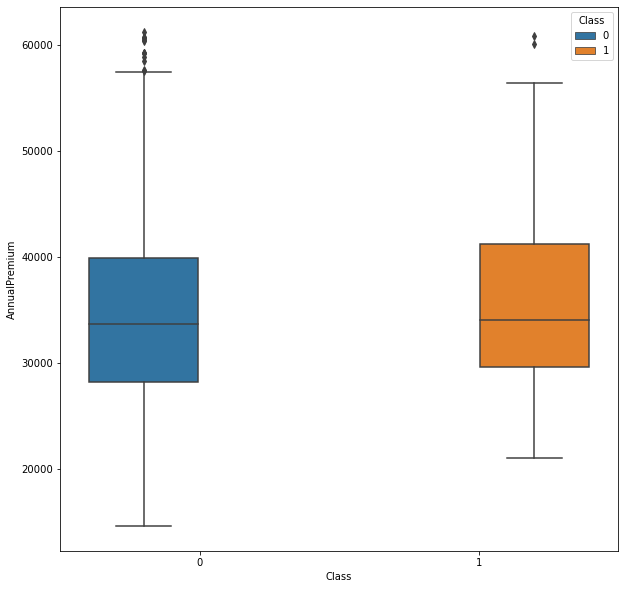

In [22]:
# Check for latest outliers 
fig, axs = plt.subplots(1, figsize = (10,10))      #fig, axs = x, y;  figsize = figure size
plt_new = sns.boxplot(x = myData_without_outliers['Class'], y= myData['AnnualPremium'], hue = myData['Class'], ax = axs)

Most outliers are eliminated while some around the border are remained to make sure the elimination would not removing too much data.

## 3.2 Label Encoding

### 3.2.1 Labeling Column(s)

In [23]:
# New Dataset : myData_with_outliers & myData_without_outliers

# Rename column name(s)
myData_with_outliers = myData_with_outliers.rename(columns={"Gender"          : "Male", 
                                                            "VehicleAge"      : "VehicleAgeGroup", 
                                                            "VehicleDamage"   : "VehicleDamagedBefore",
                                                            "Class"           : "Interested"})

myData_without_outliers = myData_without_outliers.rename(columns={"Gender"          : "Male", 
                                                                "VehicleAge"      : "VehicleAgeGroup", 
                                                                "VehicleDamage"   : "VehicleDamagedBefore",
                                                                "Class"           : "Interested"})

In this section, categorical column names and some numerical column name(s) are renamed for better understanding and prepare them for encoding precedure.

### 3.2.2 Encoding Column(s)

In [24]:
# Columns to be standardized
to_standardized = ["Male", "VehicleAgeGroup", "VehicleDamagedBefore"]

# Declare encoder
label_encoder = LabelEncoder()

# Encoding
for _, c in enumerate(to_standardized):
    myData_with_outliers[c] = label_encoder.fit_transform(myData_with_outliers[c])
    
# Encoding
for _, c in enumerate(to_standardized):
    myData_without_outliers[c] = label_encoder.fit_transform(myData_without_outliers[c])

In this section, categorical column data are encoded by representing each unique value in the column with a numerical value such as 0,1,2 and so on. For example, male in `Gender` become 1 while female become 0. For better understanding, two row of sample result are shown below. 

In [25]:
# Demonstrate two rows of data from the head
myData_with_outliers.head(2)

,Male,Age,DrivingLicense,RegionCode,PreviouslyInsured,VehicleAgeGroup,VehicleDamagedBefore,AnnualPremium,PolicySalesChannel,Interested
213783,0,27,1,21,1,1,0,31731,152,0
5250,0,23,1,41,1,1,0,26251,152,0


## 3.3 Correlation Check

<AxesSubplot:title={'center':'Heatmap for Correlation Matrix'}>

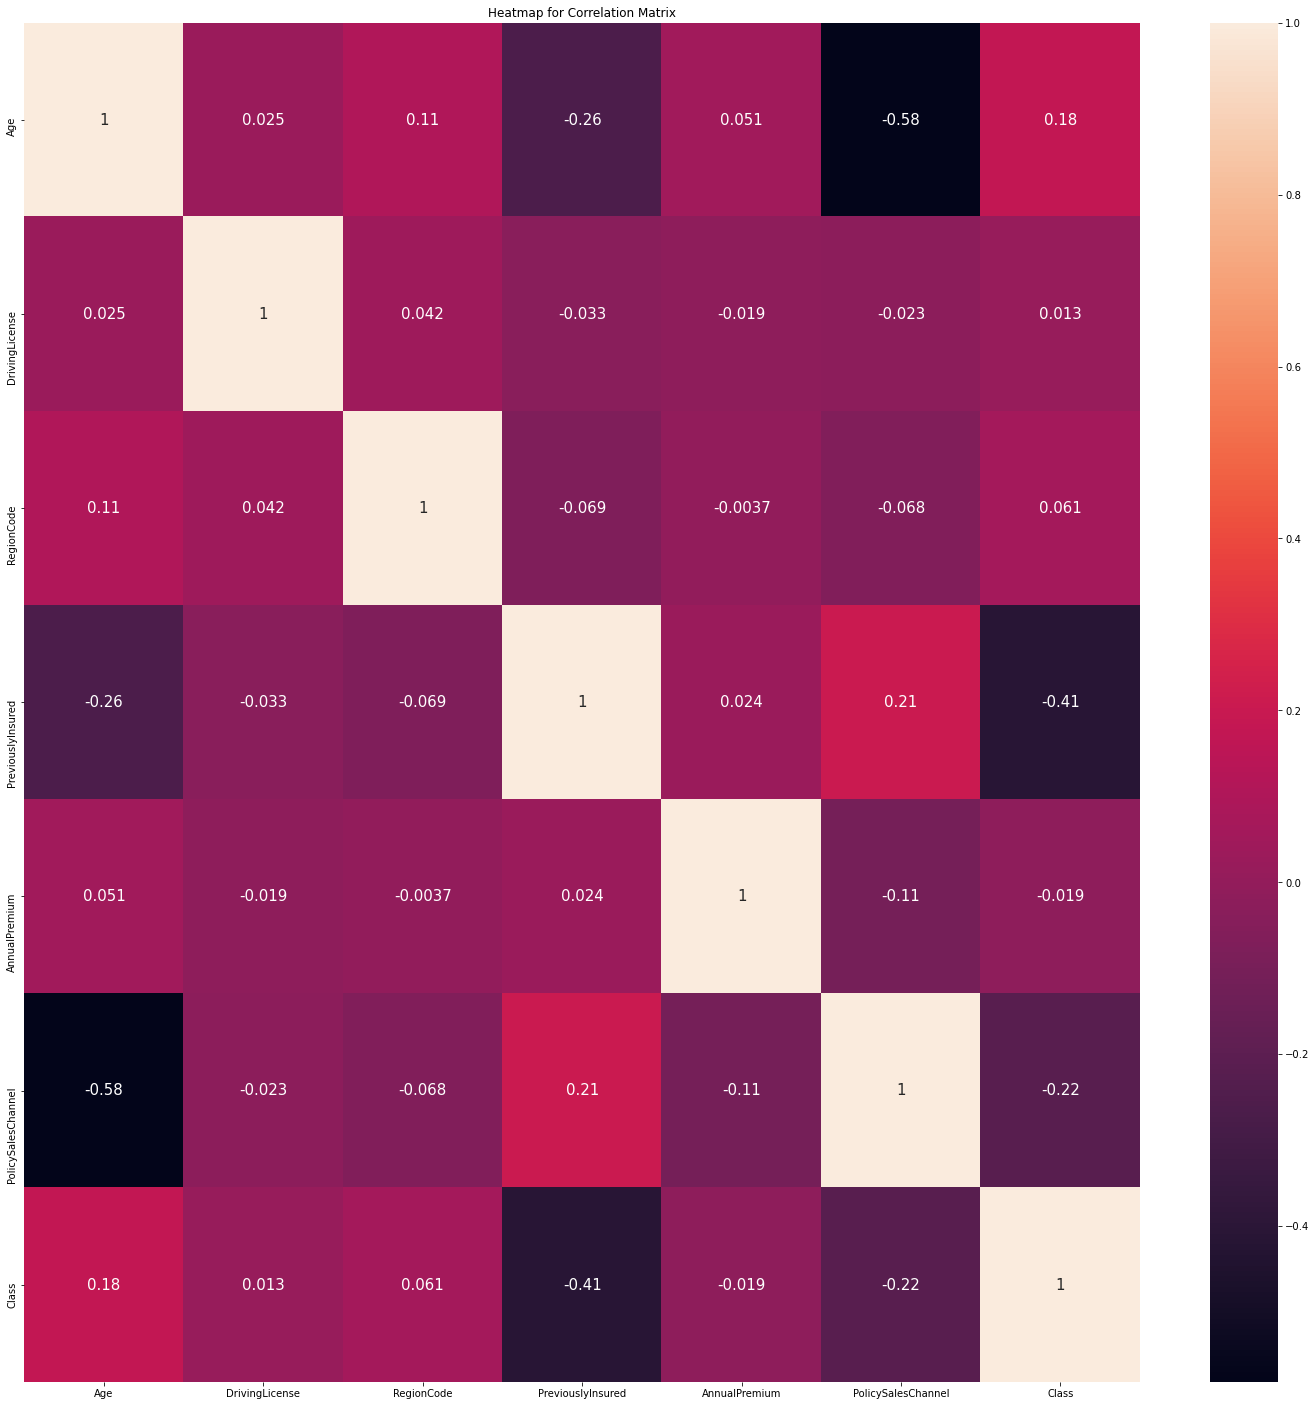

In [26]:
# Check corelation between all feature(s)
corelation = myData.corr()

plt.figure(figsize=(25, 25))
plt.title('Heatmap for Correlation Matrix')
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, 
            annot=True, annot_kws={'size':15})

From the heatmap, it is generally known that there is no variables with correlation higher than 0.8, so no additional variables will be dropped.

## 3.4 Data Splitting

In [27]:
# Seperate features from target 
X_frame_with = myData_with_outliers.drop("Interested", axis=1)
Y_frame_with = myData_with_outliers["Interested"]
X_frame_without = myData_without_outliers.drop("Interested", axis=1)
Y_frame_without = myData_without_outliers["Interested"]

# Split data into 80:20 ratio
X_train_w, X_test_w, Y_train_w, Y_test_w = train_test_split(X_frame_with, Y_frame_with, test_size = 0.2)
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_frame_without, Y_frame_without, test_size = 0.2)

In this section, data are spltted into feature frame and target frame. The spliting ratio is 80:20 for training:testing.


## 3.5 Data Scaling

In [28]:
# Declare scaler object
scaler = StandardScaler()

# Scaling
X_train_w = scaler.fit_transform(X_train_w)
X_test_w = scaler.transform(X_test_w)
X_train_n = scaler.fit_transform(X_train_n)
X_test_n = scaler.transform(X_test_n)

# Result showing
X_train_w
X_train_n

array([[-1.09192843, -1.10996636,  0.        , ..., -0.91311563,
         0.68039901,  0.89543811],
       [ 0.91581094,  2.37612948,  0.        , ...,  1.09515155,
         0.66762719, -1.64604999],
       [ 0.91581094, -1.17832118,  0.        , ...,  1.09515155,
         1.68377114,  0.89543811],
       ...,
       [-1.09192843,  0.46219451,  0.        , ...,  1.09515155,
        -1.47064442,  0.21265026],
       [-1.09192843, -0.83654708,  0.        , ...,  1.09515155,
         0.17826481,  0.21265026],
       [-1.09192843,  0.53054933,  0.        , ...,  1.09515155,
         0.37544379,  0.21265026]])

As you can see that the output of the spliting is now being transformed into the form of an array in which data points vary from 0 to 1 where the mean and the standard deviation are now rescaled to 0 and 1 respectively to fulfill the purpose of standadization.

# 4.0 Model Selection

Before moving on to select a model, the ultimate goal of this entire file is a classification problem as to predict whether the a particular customers (policyholders) will be interested in the Vehicle Insurance, thus the model selected must be able to classify the customers into Interested Category or Not Interested Category based on his given features. In this case, the models that will be trained and evaluated for comparison are k neighbour classifier, decision tree classifier and support vector machine.


## 4.1 Model Overview

<b>K-neighbour Classifier</b> 
K-nearest neighbors algorithm (k-NN) is a non-parametric classification method. KNN is a simple, supervised machine learning algorithm that is easy to implement and understand, but will become significantly slows as the size of that data in use grows.

<b>Decision Tree Classififer</b> 
Decision Tree is a popular supervised machine learning algorithm which does not require feature scaling. It require lesser effort for data preparation during data pre-processing but might increase the calculation complexity compared to other algorithms. In short, it contain decision nodes which represent values for the attribute test and leaf nodes represent a decision on the numeric target.

<b>SVM</b> 
Support vector machines are a set of supervised learning methods that are effective in high dimensional spaces. At the mean time, it is stll effective in cases where number of dimensions is greater than the number of samples.

<b>Random Forest Classfier</b> 
The basic idea behind this Random Forest Classfier is a classifying among multiple random decision trees and it's much less sensitive to the training data. In short, this model randomly performs row sampling and feature sampling from the dataset forming several decision trees by a process called Bootstrap, while the results are then aggregated into a single sample tree for output. 


## 4.2 Reusable Items

In [29]:
# Declare an array for models
models = ["knn_model", "tree_model", "svm_model"]

# Function for training, prediction, and reporting 
def predict(model, X_train, X_test, Y_train, Y_test):
    start = timeit.timeit()

    # Train model
    model.fit(X_train, Y_train)
    
    # Make training data prediction
    pred = model.predict(X_train)
    
    # Calculate training data accuracy
    train_acc = accuracy_score(Y_train, pred)
    
    # Make prediction
    pred = model.predict(X_test)
    
    # Test accuracy
    test_acc = accuracy_score(Y_test, pred)
    
    # Confusion Matrix
    conf_matr = confusion_matrix(Y_test, pred, labels=model.classes_)
    
    # Visualise confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr,display_labels=model.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()
    
    # Class Report
    class_report = classification_report(Y_test, pred, output_dict=True)
    
    # Results
    print("Classification Report:")
    print(classification_report(Y_test, pred))
    print("Training Accuracy:", train_acc)
    print("Testing Accuracy :", test_acc)
    
    time.sleep(1)
    end = timeit.timeit()
    time_consumed = end - start
    return train_acc, test_acc, conf_matr, class_report, time_consumed

# Function to overcome overfitting
def eliminate_overfitting(model, X_train, X_test, Y_train, Y_test):
    if (model == knn_model):
        # Define parameters
        params = {'n_neighbors': [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}

        # Grid Search
        gs = GridSearchCV(
            KNeighborsClassifier(),
            param_grid = params,
            verbose=1)
        
    elif (model == tree_model):
        # Define parameters
        params = {'max_depth': [x for x in range(20)]}
        
        # Grid Search
        gs = GridSearchCV(
            DecisionTreeClassifier(),
            param_grid=params,
            verbose=1)
        
    else:
        # Define parameters        
        params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

        # Grid Search
        gs = GridSearchCV(
            SVC(),
            param_grid=params,
            verbose=1)
    
    gs_results = gs.fit(X_train, Y_train)
    
    print ("Current setting:", gs_results.best_params_)
    print ("Best Estimator :", gs_results.best_estimator_)
    print ("Best Score     :", gs_results.best_score_)
    
# Function for evaluation
def evaluation(models, knn_acc, tree_acc, svm_acc, knn_time_consumed, tree_time_consumed, svm_time_consumed):
    # Setting up display setting
    size = (25, 15)
    dots_per_inch = 100

    # To milliseconds
    results = {"Models": [models[0],models[1],models[2]],
               "Accuracy": [knn_acc,tree_acc,svm_acc],
               "TimeConsumed/ms": [knn_time_consumed*1000, tree_time_consumed*1000, svm_time_consumed*1000]}
    
    results = pd.DataFrame(results)
    
    fig, axes = plt.subplots(1, 2, figsize = size, dpi=dots_per_inch)
    fig.suptitle("Model Evaluation")
    sns.barplot(data = results, x = 'Models', y = 'Accuracy', hue = 'Models', ax = axes[0])
    axes[0].set(title = '', xlabel = 'Models', ylabel = 'Accuracy')
    sns.barplot(data = results, x = 'Models', y = 'TimeConsumed/ms', hue = 'Models', ax = axes[1])
    axes[1].set(title = '', xlabel = 'Models', ylabel = 'TimeConsumed/ms')
    
    
    return results

There are altogether 1 reusable variable and 3 functions that will be used throughout the modelling.

## 4.3 K-neighbour Classifier

K-neighbour Classifier focuses on the distance between data points where one data point is compared to the other data points to group them according to their distance. Firstly, we will be obtaining the best paragmeter for training by grid search, this is done by initialising the model with K-value equal to 3.

In [30]:
# Initilise model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Obtaining best parameters
eliminate_overfitting(knn_model, X_train_w, X_test_w, Y_train_w, Y_test_w)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Current setting: {'metric': 'euclidean', 'n_neighbors': 53, 'weights': 'uniform'}
Best Estimator : KNeighborsClassifier(metric='euclidean', n_neighbors=53)
Best Score     : 0.8428571428571429


From above, the best accuracy score as well as the parameters to achieve it are shown. We will now perform modelling with given parameters.

### 4.3.1 With Outliers

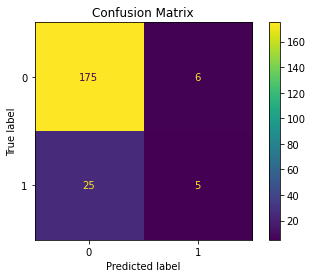

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       181
           1       0.45      0.17      0.24        30

    accuracy                           0.85       211
   macro avg       0.66      0.57      0.58       211
weighted avg       0.82      0.85      0.82       211

Training Accuracy: 1.0
Testing Accuracy : 0.8530805687203792


In [37]:
# Assigning dataset with outliers
X_train, X_test, Y_train, Y_test = X_train_w, X_test_w, Y_train_w, Y_test_w

# Initilise model
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=53, weights='distance')

# Modelling
knn_train_acc, knn_acc_w, knn_cm, knn_cr, knn_time_consumed_w = predict(knn_model, X_train, X_test, Y_train, Y_test)

### 4.3.2 Without Outliers

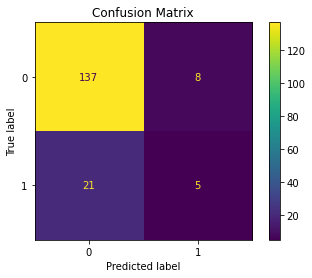

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       145
           1       0.38      0.19      0.26        26

    accuracy                           0.83       171
   macro avg       0.63      0.57      0.58       171
weighted avg       0.79      0.83      0.81       171

Training Accuracy: 1.0
Testing Accuracy : 0.8304093567251462


In [39]:
# Assigning dataset with outliers
X_train, X_test, Y_train, Y_test = X_train_n, X_test_n, Y_train_n, Y_test_n

# Initilise model
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=53, weights='distance')

# Modelling
knn_train_acc, knn_acc_n, knn_cm, knn_cr, knn_time_consumed_n = predict(knn_model, X_train, X_test, Y_train, Y_test)

The model have its training accuracy higher than the testing accuracy probably due to overfitting. Hence, it can be conclude that this model tends to approve loans for rejected applicant.


## 4.4 Decision Tree Classifier

Decision Tree Classifier focuses on splitting a nodes on the branch and each branches are the outcome of the test and each leaf node represents the class label. Firstly, we will be obtaining the best paragmeter for training by grid search.


In [52]:
# Initilise model
tree_model = DecisionTreeClassifier()

# Obtaining best parameters
eliminate_overfitting(tree_model, X_train_w, X_test_w, Y_train_w, Y_test_w)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Current setting: {'max_depth': 1}
Best Estimator : DecisionTreeClassifier(max_depth=1)
Best Score     : 0.8369047619047618


From above, the best accuracy score as well as the parameters to achieve it are shown. We will now perform modelling with given parameters.

### 4.4.1 With Outliers

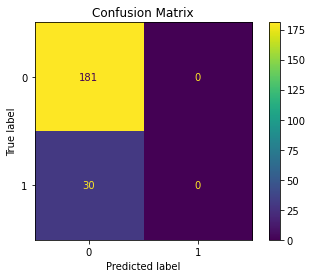

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       181
           1       0.00      0.00      0.00        30

    accuracy                           0.86       211
   macro avg       0.43      0.50      0.46       211
weighted avg       0.74      0.86      0.79       211

Training Accuracy: 0.8369047619047619
Testing Accuracy : 0.8578199052132701


In [53]:
# Assigning dataset with outliers
X_train, X_test, Y_train, Y_test = X_train_w, X_test_w, Y_train_w, Y_test_w

# Initilise model
tree_model = DecisionTreeClassifier(max_depth=1)

# Modelling
tree_train_acc, tree_acc_w, tree_cm, tree_cr, tree_time_consumed_w = predict(tree_model, X_train, X_test, Y_train, Y_test)

### 4.4.2 Without Outliers

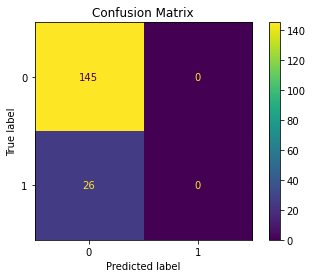

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       145
           1       0.00      0.00      0.00        26

    accuracy                           0.85       171
   macro avg       0.42      0.50      0.46       171
weighted avg       0.72      0.85      0.78       171

Training Accuracy: 0.8391812865497076
Testing Accuracy : 0.847953216374269


In [54]:
# Assigning dataset with outliers
X_train, X_test, Y_train, Y_test = X_train_n, X_test_n, Y_train_n, Y_test_n

# Initilise model
tree_model = DecisionTreeClassifier(max_depth=1)

# Modelling
tree_train_acc, tree_acc_n, tree_cm, tree_cr, tree_time_consumed_n = predict(tree_model, X_train, X_test, Y_train, Y_test)

The issue of overfitting is lower in this model compared to last model, this is probably because of the nature of this model that less sensitive to the traning data and thus increasesd its performance. 

## 4.5 Support Vector Machine

SVM is one of the high performance model. Same goes to this model, we will be obtaining the best paragmeter for training by grid search. The model will first be initialised with kernel="rbf", C=0.1 and gamma = 1

In [56]:
# Initilise model
svm_model = SVC(kernel='rbf', C=0.1, gamma=1)

# Modelling
eliminate_overfitting(svm_model, X_train_w, X_test_w, Y_train_w, Y_test_w)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Current setting: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best Estimator : SVC(C=0.1, gamma=1)
Best Score     : 0.8369047619047618


From above, the best accuracy score as well as the parameters to achieve it are shown. We will now perform modelling with given parameters.

### 4.5.1 With Outliers

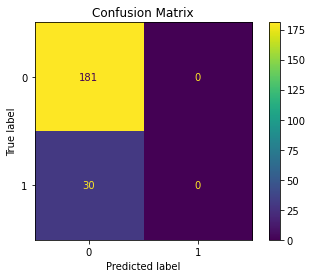

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       181
           1       0.00      0.00      0.00        30

    accuracy                           0.86       211
   macro avg       0.43      0.50      0.46       211
weighted avg       0.74      0.86      0.79       211

Training Accuracy: 0.8369047619047619
Testing Accuracy : 0.8578199052132701


In [57]:
# Assigning dataset with outliers
X_train, X_test, Y_train, Y_test = X_train_w, X_test_w, Y_train_w, Y_test_w

# Initilise model
svm_model = SVC(C=0.1, gamma=1)

# Modelling
svm_train_acc, svm_acc_w, svm_cm, svm_cr, svm_time_consumed_w = predict(svm_model, X_train, X_test, Y_train, Y_test)

### 4.5.2 Without Outliers

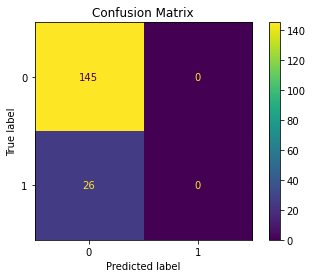

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       145
           1       0.00      0.00      0.00        26

    accuracy                           0.85       171
   macro avg       0.42      0.50      0.46       171
weighted avg       0.72      0.85      0.78       171

Training Accuracy: 0.8391812865497076
Testing Accuracy : 0.847953216374269


In [58]:
# Assigning dataset with outliers
X_train, X_test, Y_train, Y_test = X_train_n, X_test_n, Y_train_n, Y_test_n

# Initilise model
svm_model = SVC(C=0.1, gamma=1)

# Modelling
svm_train_acc, svm_acc_n, svm_cm, svm_cr, svm_time_consumed_n = predict(svm_model, X_train, X_test, Y_train, Y_test)

The model performs well and propably one of the best model.

# 5.0 Evaluation 

## 5.1 Model Evaluation 

### 5.1.1 With Outliers

,Models,Accuracy,TimeConsumed/ms
0,knn_model,0.853081,-0.4181
1,tree_model,0.857820,4.3025
2,svm_model,0.857820,7.3997


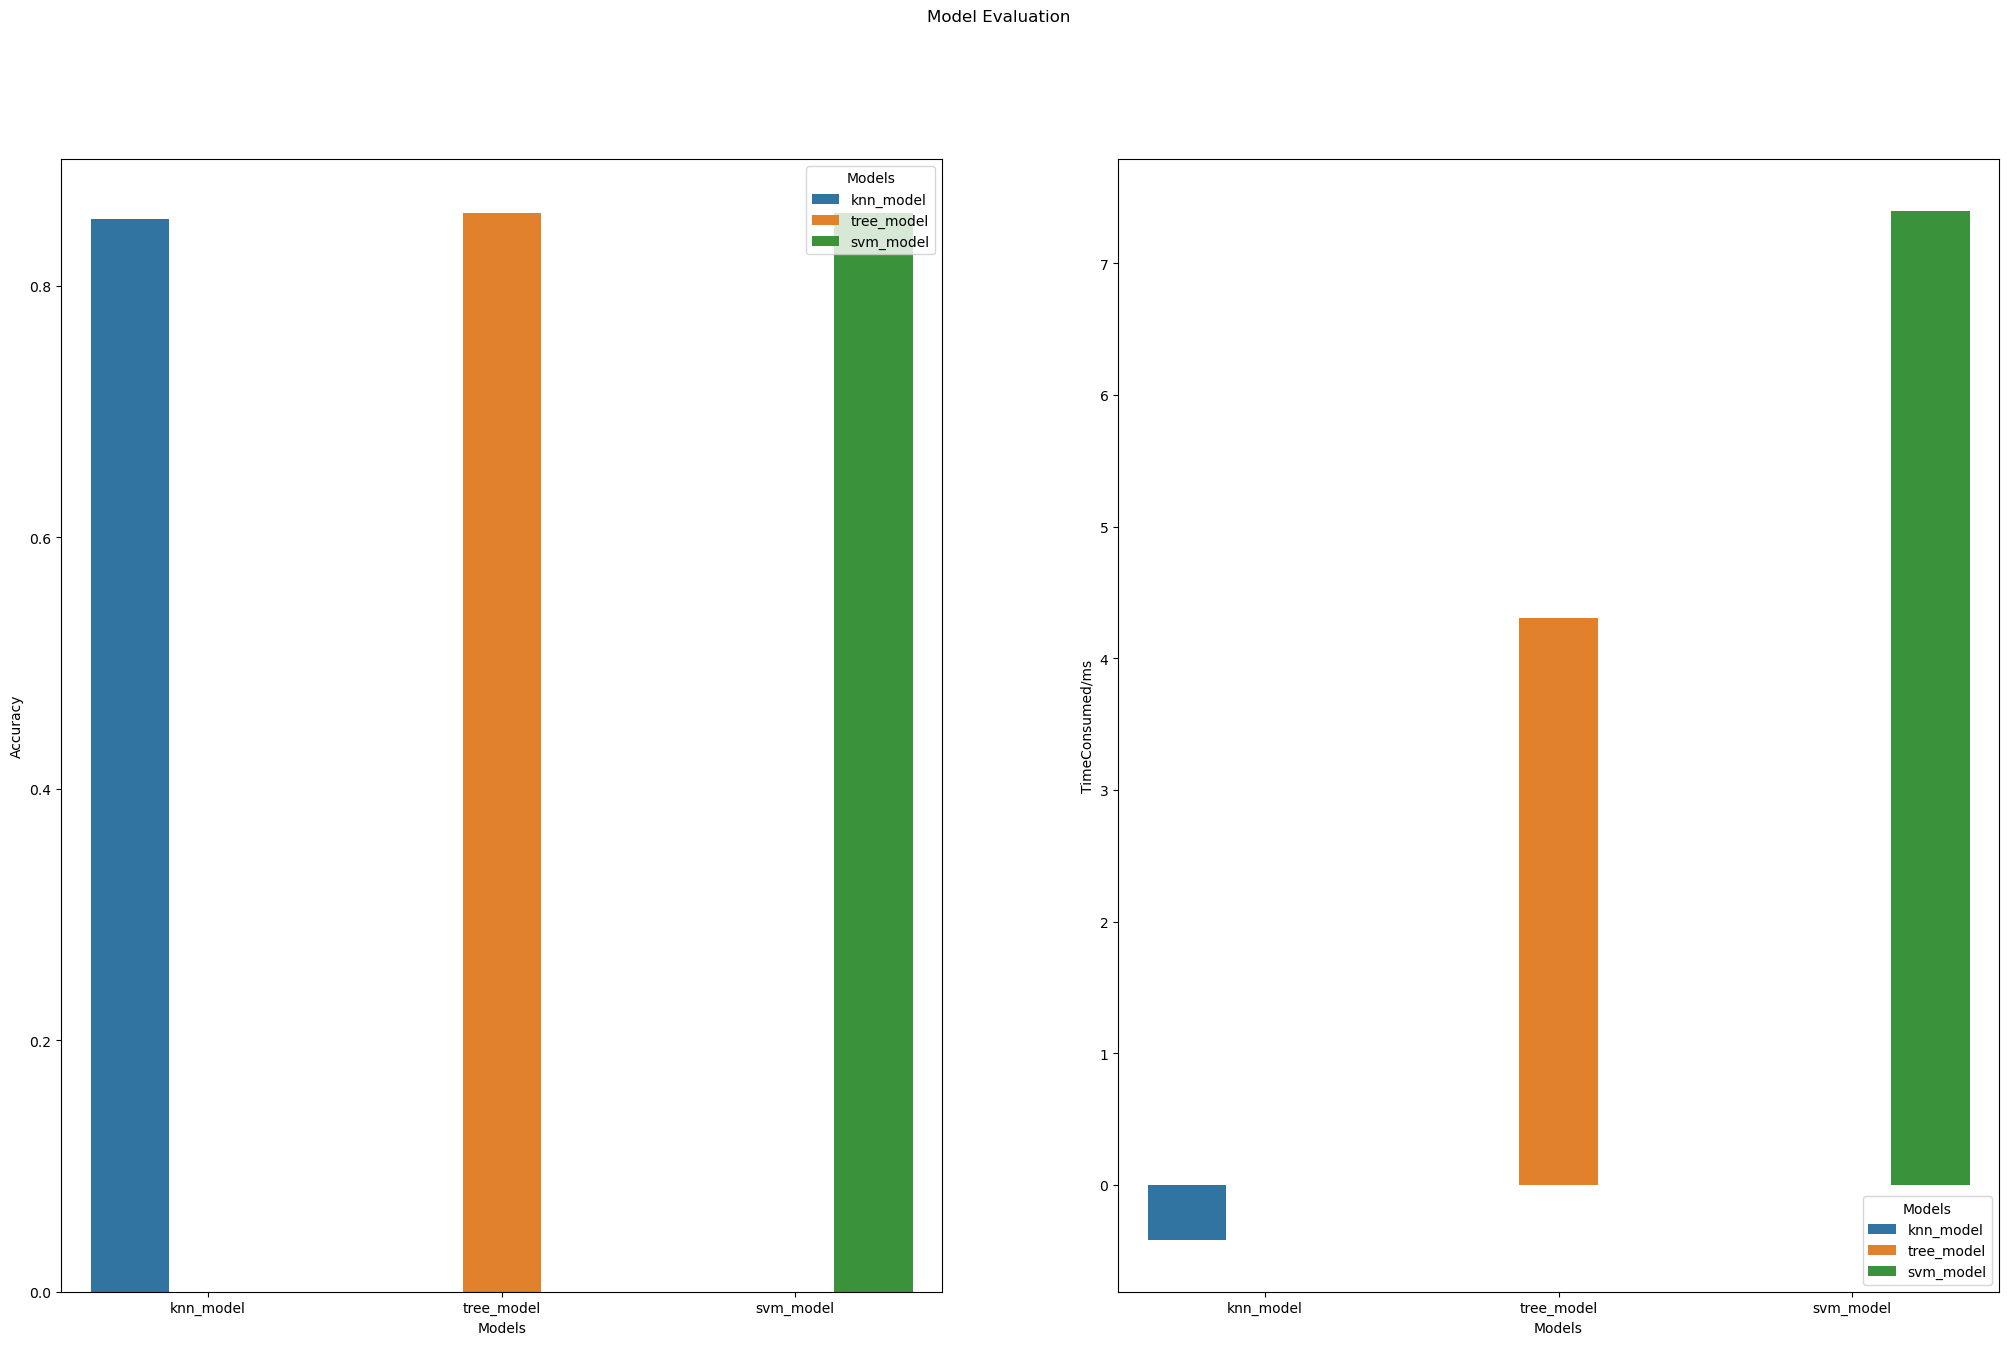

In [59]:
# Evaluate model(s)
evaluation_frame = evaluation(models, knn_acc_w, tree_acc_w, svm_acc_w, knn_time_consumed_w, tree_time_consumed_w, svm_time_consumed_w)
evaluation_frame

### 5.1.2 Without Outliers

,Models,Accuracy,TimeConsumed/ms
0,knn_model,0.830409,-0.2948
1,tree_model,0.847953,7.0236
2,svm_model,0.847953,0.4635


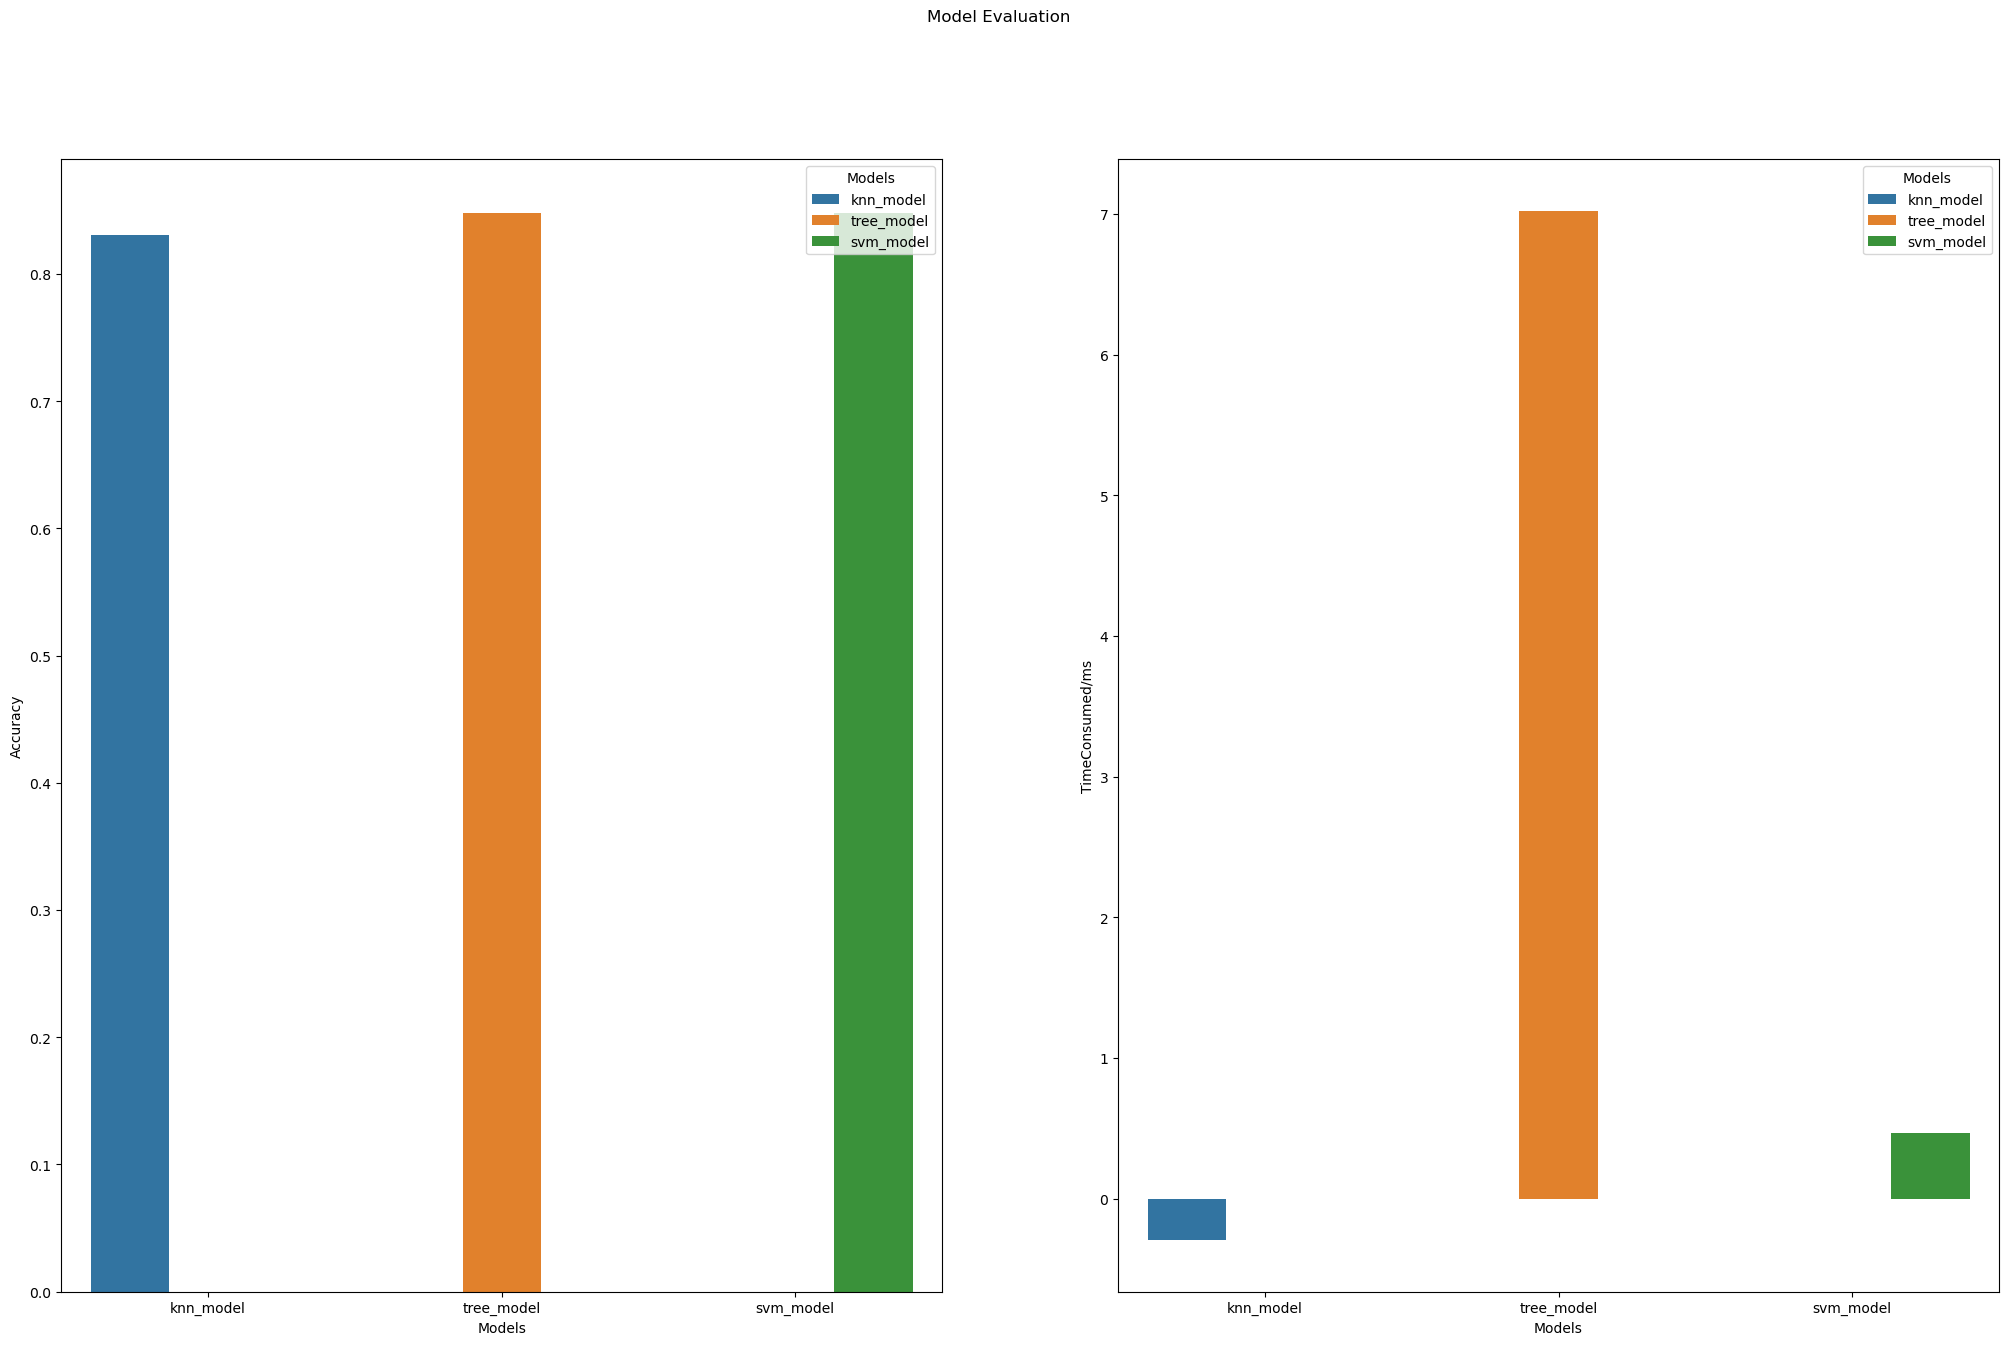

In [60]:
# Evaluate model(s)
evaluation_frame = evaluation(models, knn_acc_n, tree_acc_n, svm_acc_n, knn_time_consumed_n, tree_time_consumed_n, svm_time_consumed_n)
evaluation_frame

From above evaluation, the most suitable model for classification is the <u><b>K-nearest neighbour (KNN)</b></u> as it achived the slightly lower accuracy but its processing time was the shortest.